In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('fear_greed_index.csv')
df1.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
df2 = pd.read_csv('historical_data.csv')
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
df1['date'] = pd.to_datetime(df1['date'])
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M')

In [5]:
df1['sentiment_date'] = df1['date'].dt.floor('D')
df2['trade_date'] = df2['Timestamp IST'].dt.floor('D')

In [6]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}
df1['sentiment_score'] = df1['classification'].map(sentiment_map)

In [7]:
fear_greed_df = df1[['sentiment_date','sentiment_score','classification']]
historical_data_df = df2[['Account','Coin','Execution Price','Size Tokens','Size USD','Side','Closed PnL','Direction','trade_date','Timestamp IST']]

In [8]:
fear_greed_df.head()

,sentiment_date,sentiment_score,classification
0,2018-02-01,1,Fear
1,2018-02-02,0,Extreme Fear
2,2018-02-03,1,Fear
3,2018-02-04,0,Extreme Fear
4,2018-02-05,0,Extreme Fear


In [9]:
historical_data_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,Timestamp IST
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00


In [10]:
# Merge the two DataFrames on the date columns
merged_df = pd.merge(
    historical_data_df,
    fear_greed_df,
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,Timestamp IST,sentiment_date,sentiment_score,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00,2024-12-02,4.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00,2024-12-02,4.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00,2024-12-02,4.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00,2024-12-02,4.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,0.0,Buy,2024-12-02,2024-12-02 22:50:00,2024-12-02,4.0,Extreme Greed


In [11]:
merged_df.drop(columns=['sentiment_date'], inplace=True)

# Fill small missing sentiment 
merged_df['sentiment_score'].fillna(method='ffill', inplace=True)
merged_df['classification'].fillna(method='ffill', inplace=True)

C:\Users\Ishmeet\AppData\Local\Temp\ipykernel_37168\1502359285.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['sentiment_score'].fillna(method='ffill', inplace=True)
C:\Users\Ishmeet\AppData\Local\Temp\ipykernel_37168\1502359285.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['sentiment_score'].fillna(method='ffill', inplace=True)
C:\Users\Ishmeet\AppData\Local\Temp\ipykernel_37168\1502359285.py:5: FutureWarnin

In [12]:
merged_df = merged_df.sort_values('Timestamp IST')

In [13]:
# checking the number of trades with and without sentiment data
total_trades = len(merged_df)
matched_sentiment = merged_df['sentiment_score'].notna().sum()
unmatched_sentiment = total_trades - matched_sentiment
print(f"Total Trades: {total_trades}")
print(f"Matched Sentiment: {matched_sentiment}")
print(f"Unmatched Sentiment: {unmatched_sentiment}")
merged_df.head()

Total Trades: 211224
Matched Sentiment: 211224
Unmatched Sentiment: 0


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Direction,trade_date,Timestamp IST,sentiment_score,classification
83770,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.08240,156.39,BUY,0.0,Open Long,2023-05-01,2023-05-01 01:06:00,3.0,Greed
83771,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.07220,137.08,BUY,0.0,Open Long,2023-05-01,2023-05-01 01:06:00,3.0,Greed
83769,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.09670,183.53,BUY,0.0,Open Long,2023-05-01,2023-05-01 01:06:00,3.0,Greed
39063,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,0.0,Open Short,2023-12-05,2023-12-05 03:11:00,4.0,Extreme Greed
39062,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,0.0,Open Short,2023-12-05,2023-12-05 03:11:00,4.0,Extreme Greed


In [14]:
merged_df.to_csv('merged_data.csv', index=False)
# Save the merged DataFrame to a CSV file

In [15]:
# Trade level feature 
merged_df['PnL_bin'] = merged_df['Closed PnL'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else 'Zero'))
# PnL bin (profit/loss/zero)

In [16]:
# Convert 'Side' to binary values
merged_df['Side_Binary'] = merged_df['Side'].apply(lambda x : 1 if str(x).upper() == 'BUY' else 0)
# Trade Imapct (proxy for exposure)
merged_df['Trade_Imapct'] = merged_df['Size USD']
# Normalized PnL = PnL/Size USD (risk Adjusted return)
merged_df['Closed_PnL_Numeric'] = historical_data_df['Closed PnL']
merged_df['Normalized_PnL'] = merged_df.apply(
    lambda row : row['Closed_PnL_Numeric'] / row['Size USD'] if row['Size USD'] else 0, axis=1
)

In [17]:
merged_df[['Account', 'trade_date', 'Side', 'Side_Binary', 'Size USD',
           'Closed PnL', 'PnL_bin', 'Trade_Imapct', 'Normalized_PnL','classification']].head()

,Account,trade_date,Side,Side_Binary,Size USD,Closed PnL,PnL_bin,Trade_Imapct,Normalized_PnL,classification
83770,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,2023-05-01,BUY,1,156.39,0.0,Zero,156.39,0.0,Greed
83771,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,2023-05-01,BUY,1,137.08,0.0,Zero,137.08,0.0,Greed
83769,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,2023-05-01,BUY,1,183.53,0.0,Zero,183.53,0.0,Greed
39063,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2023-12-05,SELL,0,24370.62,0.0,Zero,24370.62,0.0,Extreme Greed
39062,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2023-12-05,SELL,0,628.00,0.0,Zero,628.00,0.0,Extreme Greed


In [18]:
# Account_Level Daily Aggregation

daily_account_stats = merged_df.groupby(['Account', 'trade_date', 'classification', 'sentiment_score']).agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': ['sum', 'mean'],
    'Side_Binary': 'mean',  
    'PnL_bin': lambda x: (x == 'Profit').sum(),  
    'Account': 'count'  
}).reset_index()

daily_account_stats.columns = [
    'Account', 'trade_date', 'classification', 'sentiment_score',
    'Total_PnL', 'Avg_PnL',
    'Total_Trade_Size', 'Avg_Trade_Size',
    'Buy_Ratio',
    'Profit_Trades',
    'Total_Trades'
]

daily_account_stats['Profit_Rate'] = daily_account_stats['Profit_Trades'] / daily_account_stats['Total_Trades']
daily_account_stats.head()

,Account,trade_date,classification,sentiment_score,Total_PnL,Avg_PnL,Total_Trade_Size,Avg_Trade_Size,Buy_Ratio,Profit_Trades,Total_Trades,Profit_Rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,4.0,0.0,0.000000,900880.13,5089.718249,0.000000,0,177,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,4.0,0.0,0.000000,542413.18,7976.664412,0.000000,0,68,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,4.0,0.0,0.000000,949380.00,23734.500000,0.000000,0,40,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,Extreme Greed,4.0,-21227.0,-1768.916667,338240.00,28186.666667,1.000000,0,12,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,Extreme Greed,4.0,1603.1,59.374074,465700.00,17248.148148,0.444444,12,27,0.444444


C:\Users\Ishmeet\AppData\Local\Temp\ipykernel_37168\2924451745.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


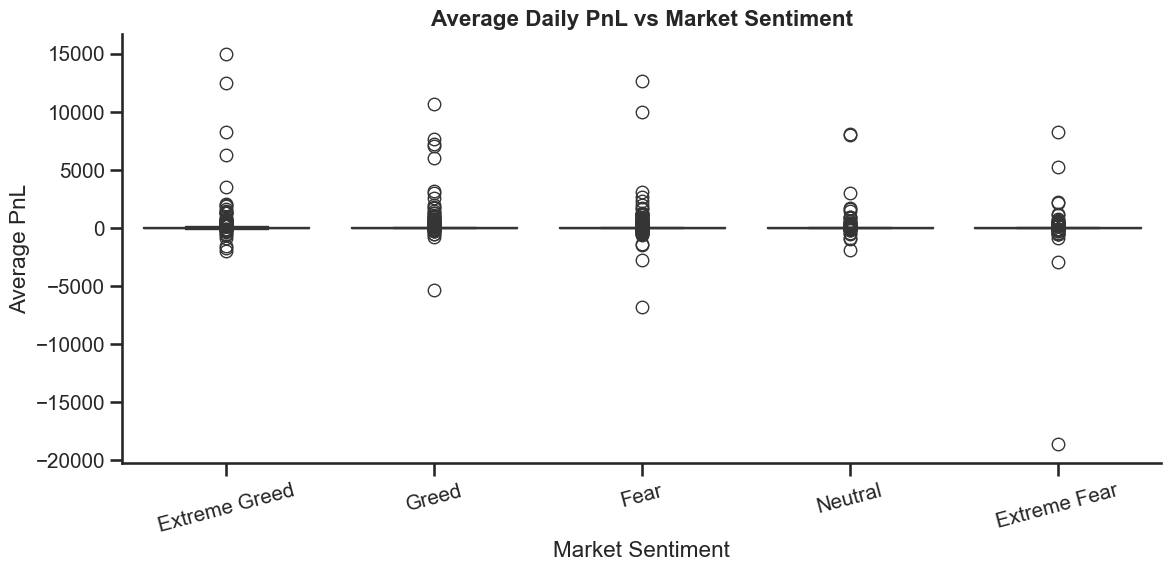

C:\Users\Ishmeet\AppData\Local\Temp\ipykernel_37168\2924451745.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


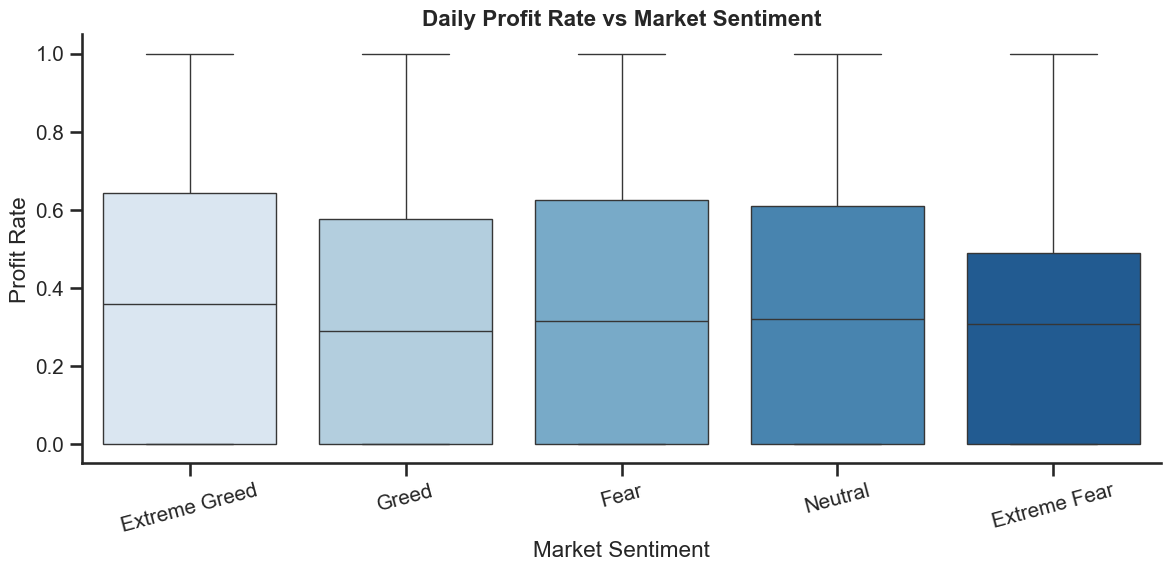

C:\Users\Ishmeet\AppData\Local\Temp\ipykernel_37168\2924451745.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


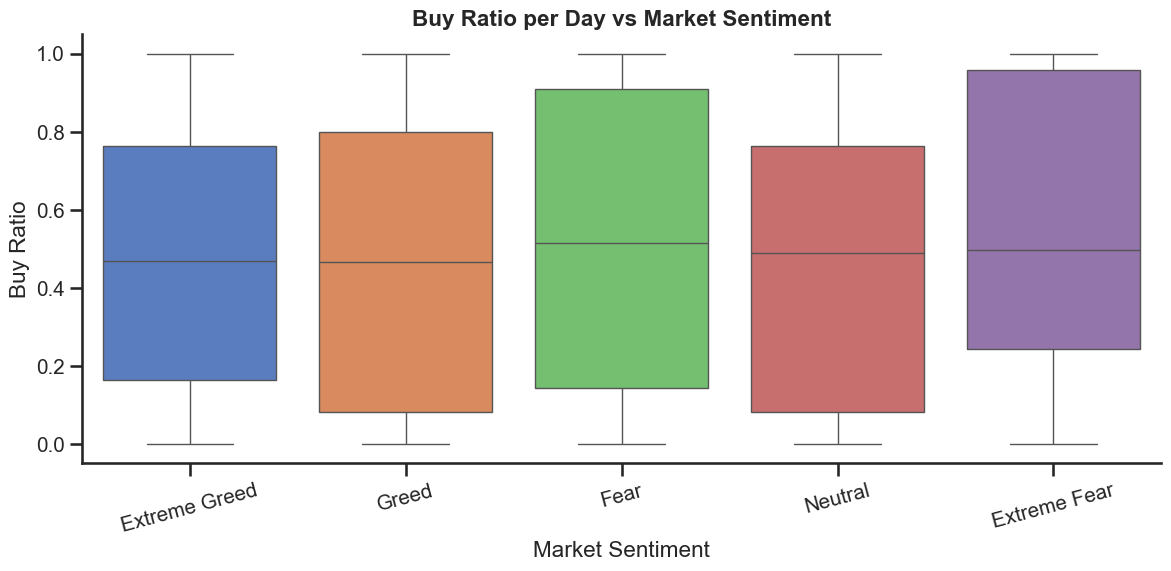

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="ticks",
    context="talk",
    font_scale=0.9
)

plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# Plot 1: Average PnL vs Sentiment

plt.figure()
sns.boxplot(
    data=daily_account_stats,
    x='classification',
    y='Avg_PnL',
    palette=["#d73027", "#fc8d59", "#fee08b", "#91cf60", "#1a9850"]
)
plt.title("Average Daily PnL vs Market Sentiment", weight="bold")
plt.ylabel("Average PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 2: Profit Rate vs Sentiment

plt.figure()
sns.boxplot(
    data=daily_account_stats,
    x='classification',
    y='Profit_Rate',
    palette=sns.color_palette("Blues", n_colors=5)
)
plt.title("Daily Profit Rate vs Market Sentiment", weight="bold")
plt.ylabel("Profit Rate")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Plot 3: Buy Ratio vs Sentiment

plt.figure()
sns.boxplot(
    data=daily_account_stats,
    x='classification',
    y='Buy_Ratio',
    palette=sns.color_palette("muted", n_colors=5)
)
plt.title("Buy Ratio per Day vs Market Sentiment", weight="bold")
plt.ylabel("Buy Ratio")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [37]:
print(merged_df['PnL_bin'].value_counts())

PnL_bin
Zero      106815
Profit     86869
Loss       17539
Name: count, dtype: int64


In [21]:
target_map = {'Loss': 0, 'Zero': 1, 'Profit': 2}
merged_df['target'] = merged_df['PnL_bin'].map(target_map)

In [22]:
sent_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

merged_df['sentiment_num'] = merged_df['classification'].map(sent_map)


In [23]:
merged_df = merged_df.sort_values('trade_date')

merged_df['pnl_lag1'] = merged_df['Closed PnL'].shift(1)
merged_df['size_lag1'] = merged_df['Size USD'].shift(1)
merged_df['sent_lag1'] = merged_df['sentiment_num'].shift(1)

merged_df.dropna(inplace=True)


In [24]:
features = [
    'Side_Binary',
    'Size USD',
    'Trade_Imapct',
    'sentiment_num',
    'pnl_lag1',        
    'size_lag1',
    'sent_lag1'
]

X = merged_df[features]
y = merged_df['target']

In [26]:
split = int(len(X) * 0.8)

X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [27]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: w for i, w in enumerate(weights)}
print(class_weights)


{0: 4.575257899439525, 1: 0.6587990362347658, 2: 0.7914400932990487}


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_rf = {
    'n_estimators': [200, 300, 400],
    'max_depth': [6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_search = RandomizedSearchCV(
    rf,
    param_rf,
    n_iter=10,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    objective='multi:softprob',
    num_class=3,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

xgb.fit(X_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack = StackingClassifier(
    estimators=[
        ('rf', rf_best),
        ('xgb', xgb),
        ('gb', gb)
    ],
    final_estimator=LogisticRegression(max_iter=500)
)

stack.fit(X_train, y_train)
preds = stack.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      5228
           1       0.90      0.91      0.90     21317
           2       0.89      0.88      0.89     15700

    accuracy                           0.89     42245
   macro avg       0.87      0.86      0.87     42245
weighted avg       0.89      0.89      0.89     42245

[[ 4191   679   358]
 [  611 19361  1345]
 [  354  1465 13881]]


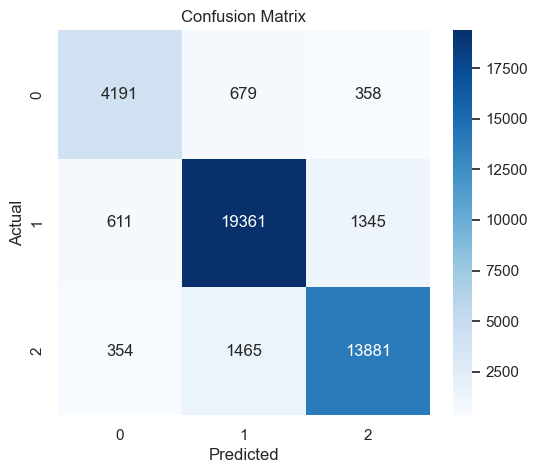

In [33]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

pnl_lag1         0.642563
Side_Binary      0.200105
sent_lag1        0.058715
sentiment_num    0.030621
Trade_Imapct     0.025238
Size USD         0.023143
size_lag1        0.019615
dtype: float32


C:\Users\Ishmeet\AppData\Local\Temp\ipykernel_37168\3350293193.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette="magma")


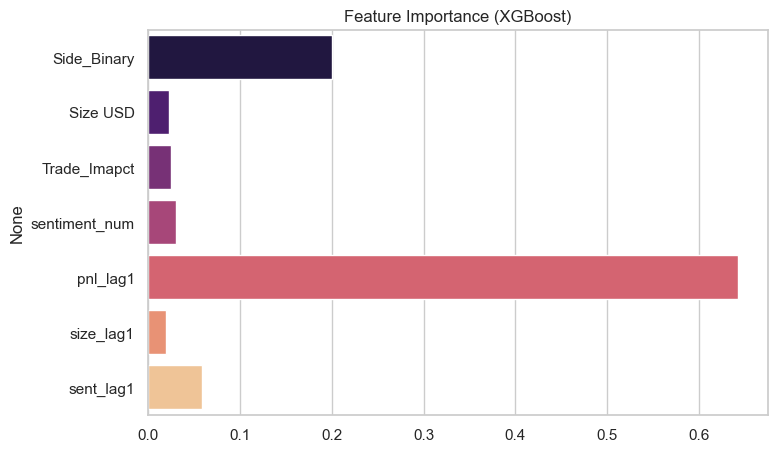

In [34]:
importance = pd.Series(xgb.feature_importances_, index=features)
print(importance.sort_values(ascending=False))

plt.figure(figsize=(8,5))
sns.barplot(x=importance.values, y=importance.index, palette="magma")
plt.title("Feature Importance (XGBoost)")
plt.show()

In [35]:
import joblib

joblib.dump(stack, "trader_model.pkl")
joblib.dump(features, "features.pkl")  

['features.pkl']